In [1]:
import math
import pandas as pd
import numpy as np
import inflection
import seaborn as sns 
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import datetime
from src import tools

## 4.0 ANALISE EXPLORATORIA DOS DADOS

In [2]:
df4 = pd.read_csv('data/df3_tratado.csv')

### 4.1. Analise Univariada

#### 4.1.1 Variavel Target

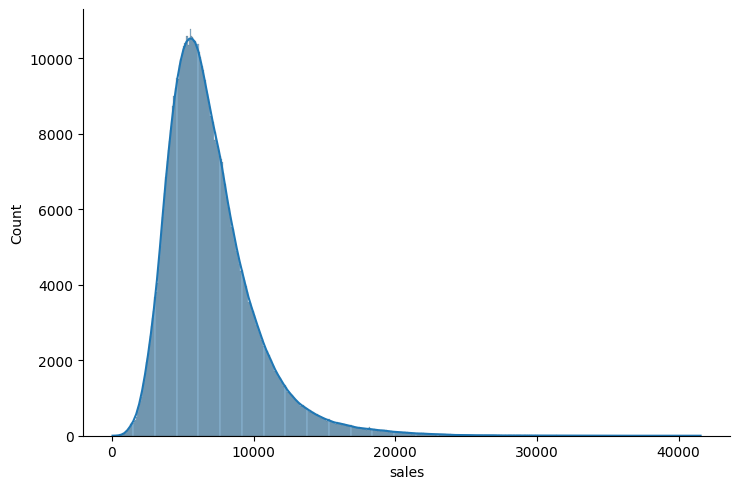

In [3]:
sns.displot(df4['sales'], aspect= 1.5, kde = True )
plt.show()

#### 4.1.2 Variaveis Numérica

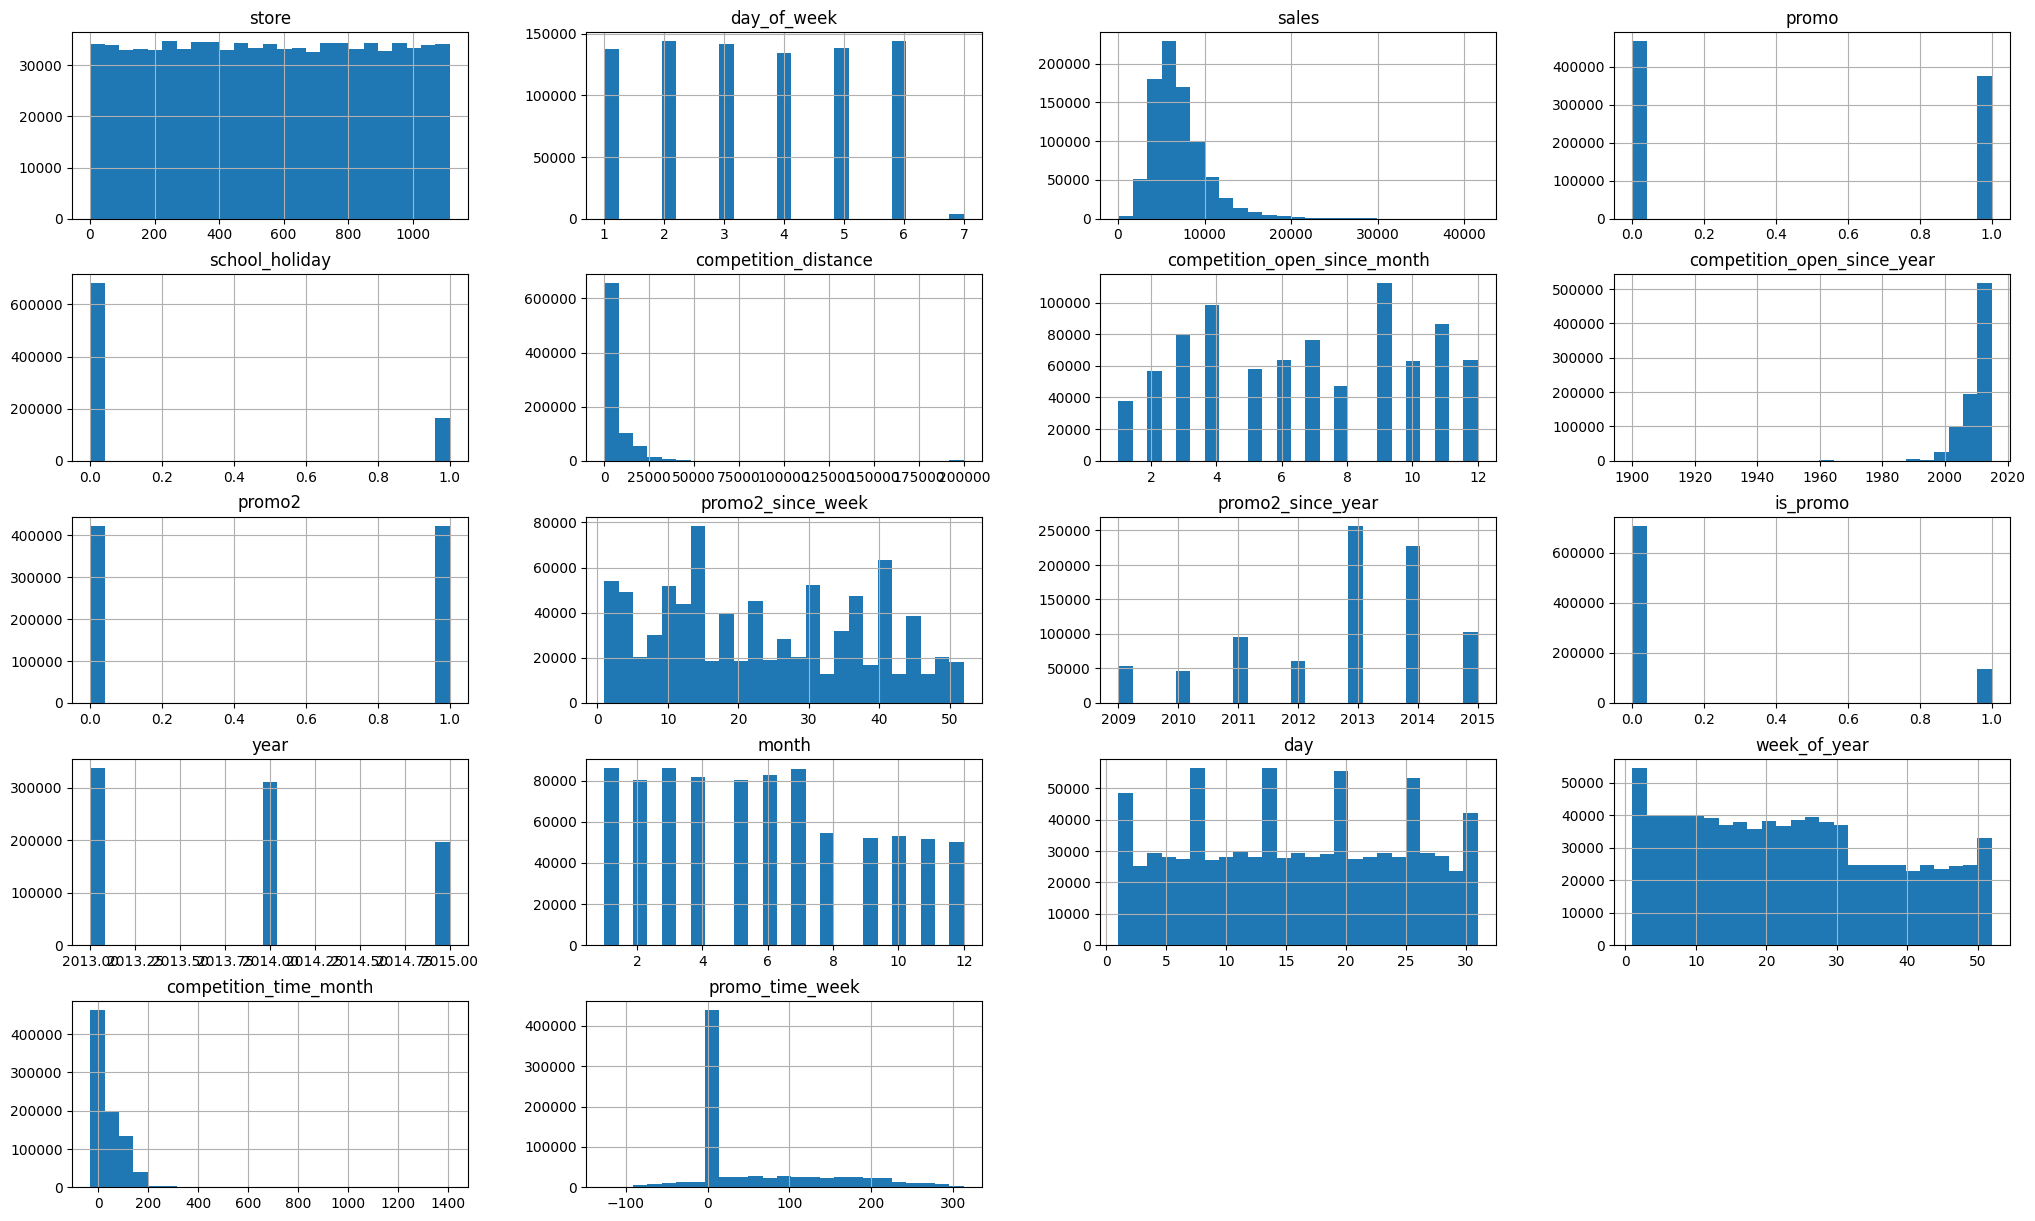

In [4]:
num_atributes = df4.select_dtypes(include= ['int64', 'float64'])


num_atributes.hist(bins = 25, figsize= (25,15))
plt.show()

#### 4.1.2 Variaveis Categóricas

In [5]:
a = df4[df4['state_holiday'] != 'regular_day']
a['state_holiday'].unique()

array(['public_holiday', 'easter_holiday', 'christmas'], dtype=object)

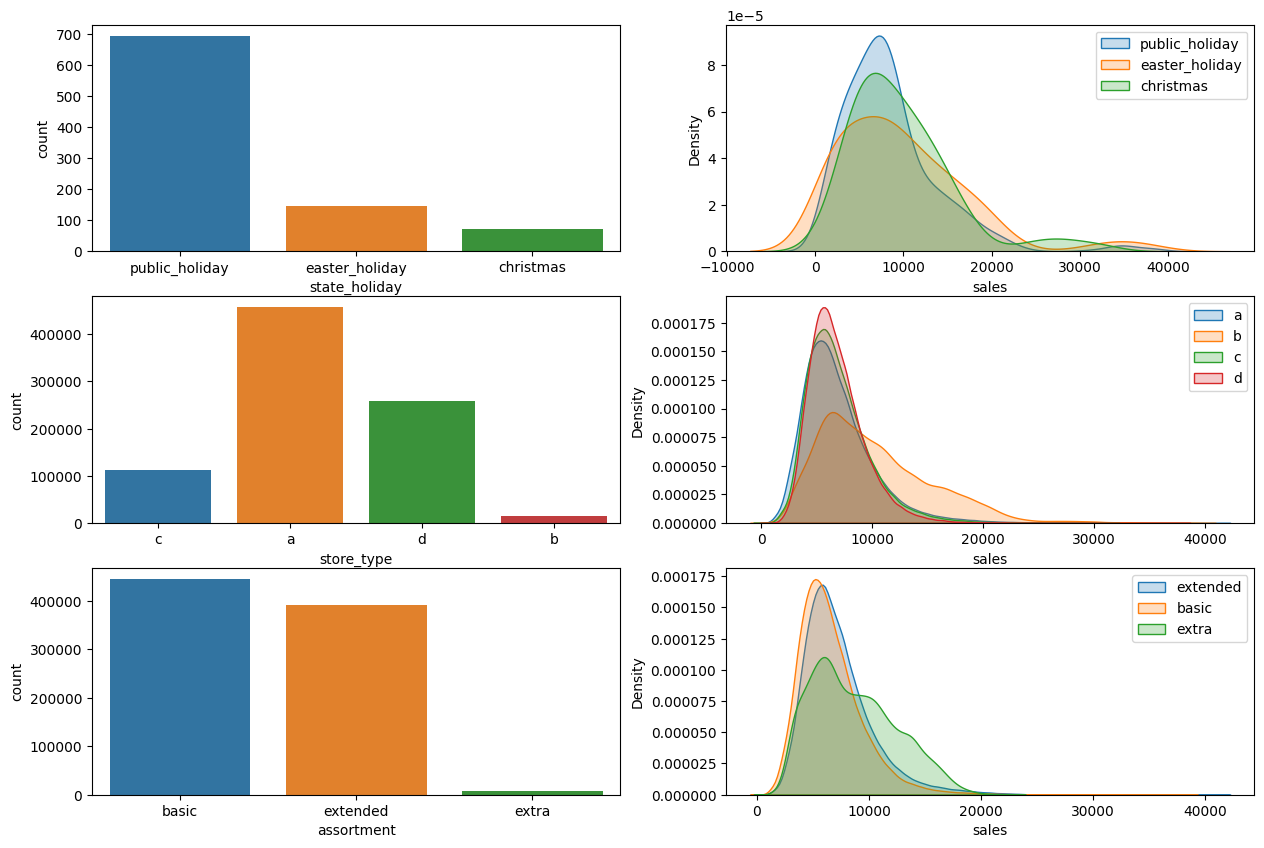

In [6]:
# state_holiday
plt.figure(figsize= (15,10))
plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(data=a, x='state_holiday')


plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True )
plt.legend()
# store_type
plt.subplot( 3, 2, 3 )
sns.countplot(data =  df4, x = 'store_type' )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', fill=True )
plt.legend()
# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( data = df4, x = 'assortment' )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True )
plt.legend()
plt.show()


### 4.1. Analise Bivariada

#### **H1.** Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.

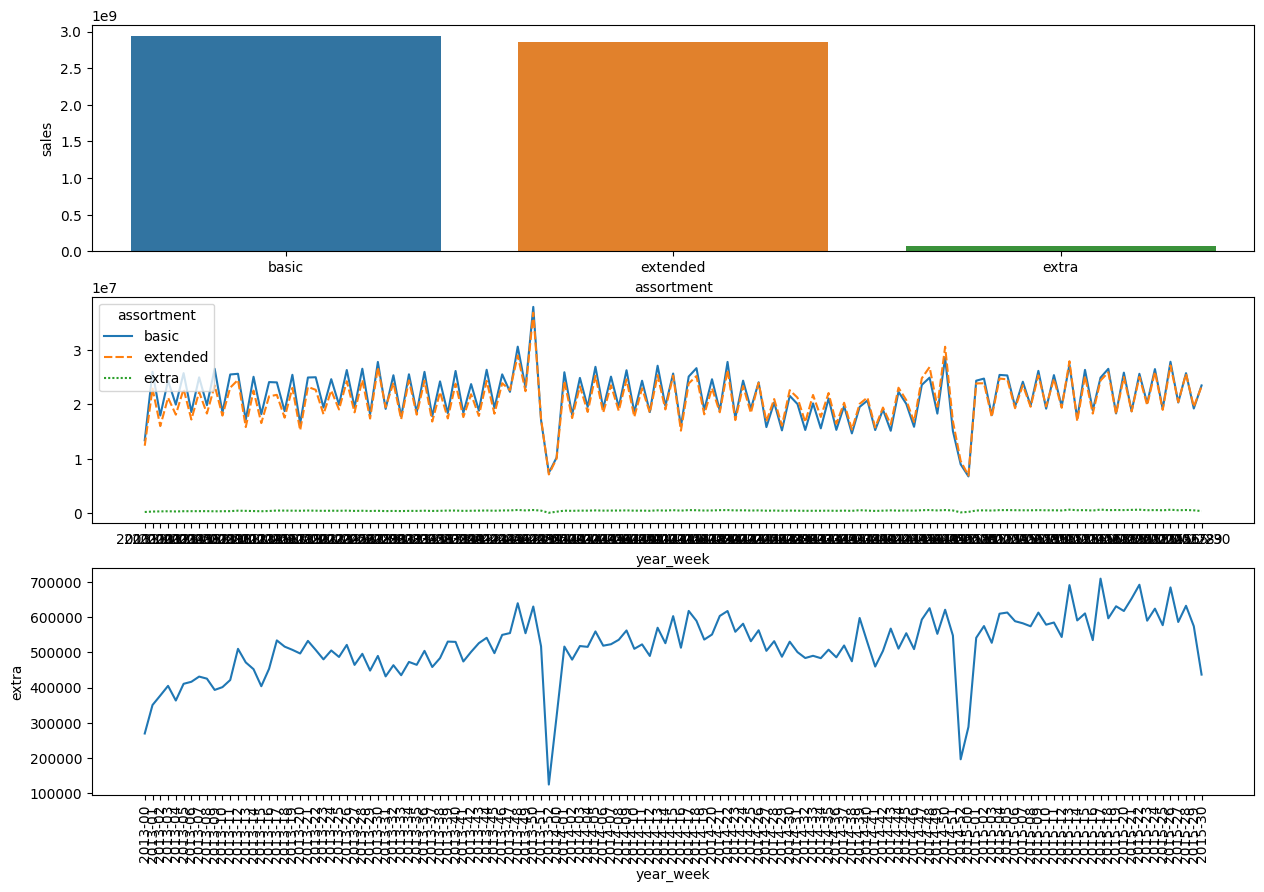

In [32]:

#dados
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux3 = aux2[aux2['assortment'] == 'extra']
aux2 = aux2.pivot( index='year_week', columns='assortment', values='sales' )
aux3  = aux3.pivot( index='year_week', columns='assortment', values='sales' )


plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.barplot( x='assortment', y='sales', data=aux1 )

plt.subplot(3,1,2)
sns.lineplot(aux2, )

plt.subplot(3,1,3)
sns.lineplot(data = aux3, x = aux3.index, y = aux3.extra)
plt.xticks( rotation=90 )

# Rotacionar os valores do eixo x em 45 graus

plt.show()


#### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.

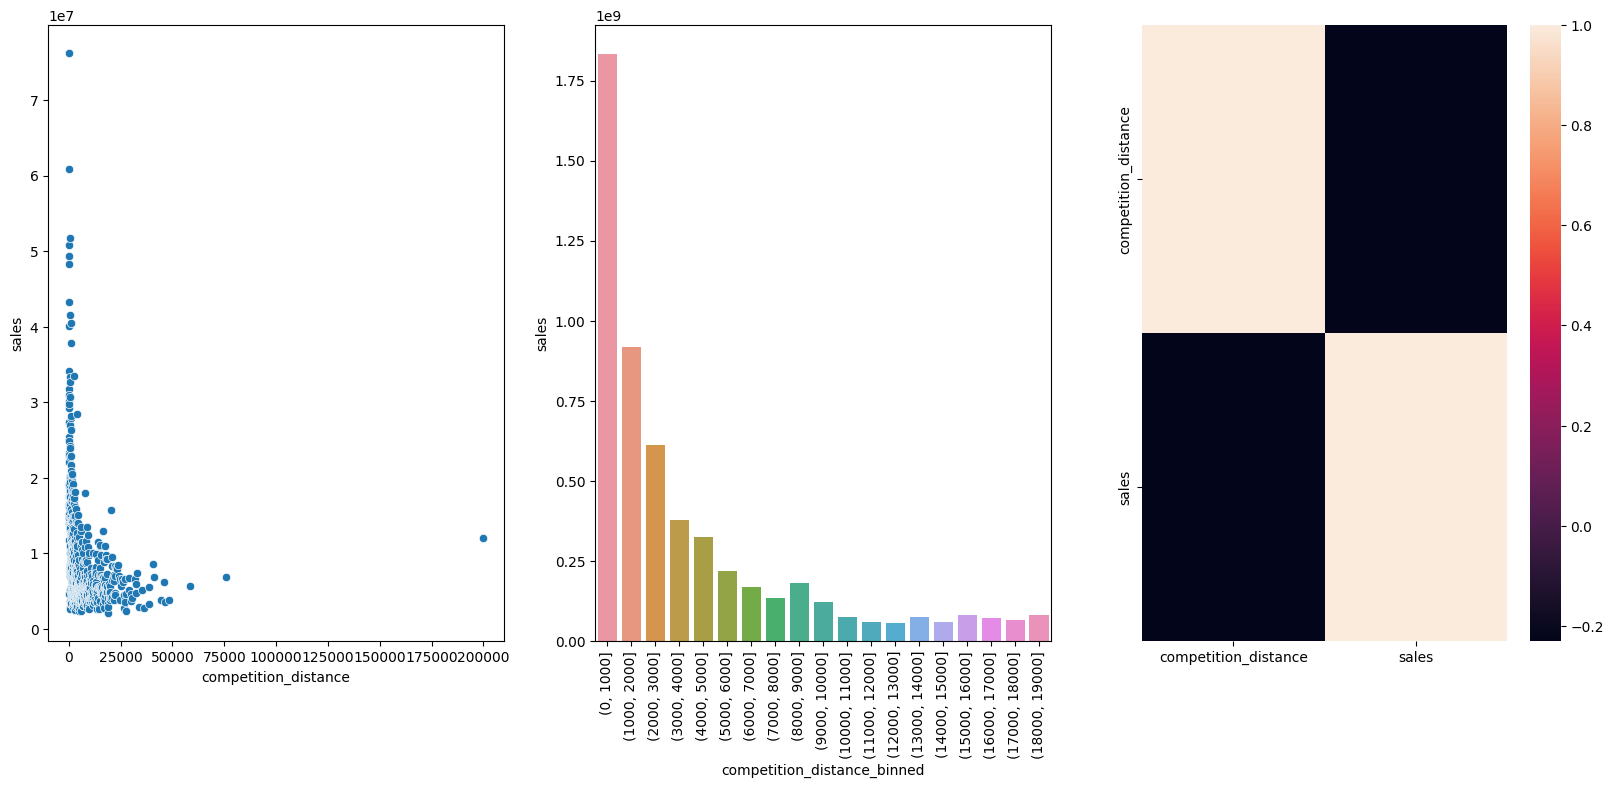

In [40]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.figure(figsize= (20,8))
# Converter colunas com Interval para strings
aux1['competition_distance'] = aux1['competition_distance'].astype(float)
aux1['sales'] = aux1['sales'].astype(float)

# Plotar o heatmap
plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 )
plt.xticks( rotation=90 )

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1[['competition_distance', 'sales']].corr( method='pearson' ) )


In [1]:
sdsdsd

NameError: name 'sdsdsd' is not defined

### 4.1. Analise Multivariada

#### 4.1.2 Variaveis Numéricas

#### 4.1.2 Variaveis Categóricas